# Ploynomial Regression

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!conda update seaborn 
import seaborn as sns

print('libraries imported')

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
seaborn                   0.9.0                    py35_0  
libraries imported


In [3]:
# The code was removed by Watson Studio for sharing.

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [10]:
# setting inputs and outputs
X = df.iloc[:,1:2]
Y = df.iloc[:,2:3]

In [11]:
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [12]:
Y.head()

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000


### Exploratory DataAnalysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
df.shape

(10, 3)

### Data Visualisation

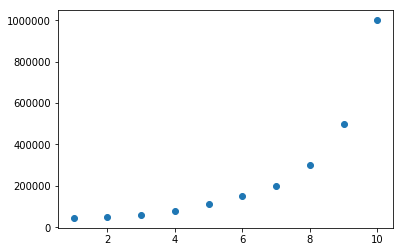

In [16]:
# scatter plot
plt.scatter(X.values,Y.values)

### Modelling

#### sklearn.preprocessing.PolynomialFeatures
`class sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)`
- Generate polynomial and interaction features.

- Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [18]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.],
       [   1.,   10.,  100.]])

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Polynomial regression degree = 2')

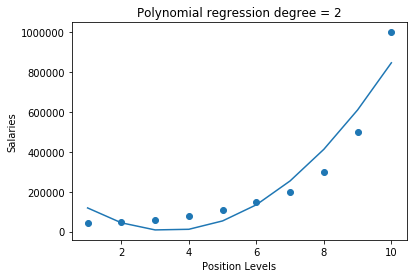

In [21]:
plt.scatter(X.values,Y.values)
plt.plot(X.values,regressor.predict(X_poly))
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.title('Polynomial regression degree = 2')

In [23]:
y_pred = regressor.predict(X_poly)

### Metrics

In [26]:
from sklearn import metrics
print("Mean absolute error is",metrics.mean_absolute_error(y_pred,Y.values))
print("Mean squared error is",metrics.mean_squared_error(y_pred,Y.values))
print("Root Mean squared error is",np.sqrt(metrics.mean_squared_error(y_pred,Y.values)))

Mean absolute error is 70218.1818182
Mean squared error is 6758833333.33
Root Mean squared error is 82212.1240045


In [28]:
regressor.predict(poly.fit_transform(6.5))

array([[ 189498.10606061]])